# Apprenticeship Capstone Project

Import relevant datasets

In [1]:
### imports ###
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn import model_selection 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

# Tournament Seed

Load in relevant datasets

In [2]:
teams = pd.read_csv('data/Teams.csv')
seeds = pd.read_csv('data/NCAATourneySeeds.csv')
tourney = pd.read_csv('data/NCAATourneyCompactResults.csv')

In [3]:
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [4]:
seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [5]:
tourney.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [6]:
seeds['SeedNum'] = seeds['Seed'].str[1:3]
seeds['SeedNum'] = pd.to_numeric(seeds['SeedNum'])
seeds.drop('Seed', inplace = True, axis=1)
seeds.head()

,Season,TeamID,SeedNum
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


In [7]:
tourney_features = ['Season', 'WTeamID', 'LTeamID']
tourney = tourney[tourney_features]
tourney.head()

,Season,WTeamID,LTeamID
0,1985,1116,1234
1,1985,1120,1345
2,1985,1207,1250
3,1985,1229,1425
4,1985,1242,1325


In [8]:
Wteams = seeds.rename(columns = {'TeamID':'WTeamID', 'SeedNum':'WSeedNum'})
Lteams = seeds.rename(columns = {'TeamID':'LTeamID', 'SeedNum':'LSeedNum'})
win_merge = pd.merge(left = tourney, right = Wteams, how = 'left', on = ['Season', 'WTeamID'])
data = pd.merge(left = win_merge, right = Lteams, how = 'left', on = ['Season', 'LTeamID'])
data.head()

,Season,WTeamID,LTeamID,WSeedNum,LSeedNum
0,1985,1116,1234,9,8
1,1985,1120,1345,11,6
2,1985,1207,1250,1,16
3,1985,1229,1425,9,8
4,1985,1242,1325,3,14


In [9]:
data['SeedDifferential'] = data['WSeedNum'] - data['LSeedNum']
data.head()

,Season,WTeamID,LTeamID,WSeedNum,LSeedNum,SeedDifferential
0,1985,1116,1234,9,8,1
1,1985,1120,1345,11,6,5
2,1985,1207,1250,1,16,-15
3,1985,1229,1425,9,8,1
4,1985,1242,1325,3,14,-11


In [10]:
wins = pd.DataFrame()
wins['SeedDifferential'] = data['SeedDifferential']
wins['WinLoss'] = 1

losses = pd.DataFrame()
losses['SeedDifferential'] = -data['SeedDifferential']
losses['WinLoss'] = 0

In [11]:
reg_dataset = pd.concat([wins,losses])
reg_dataset.head()

,SeedDifferential,WinLoss
0,1,1
1,5,1
2,-15,1
3,1,1
4,-11,1


In [12]:
# Split the data into target and predictors
y = reg_dataset['WinLoss']
X = reg_dataset.drop(columns=['WinLoss'], axis=1)

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept = False, C=1e16, solver='liblinear')

# Fit the model
logreg.fit(X_train,  y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

In [15]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

Looking at how many time was the classifier correct on the training set?

In [16]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    2251
1     924
Name: WinLoss, dtype: int64
------------------------------------
0    0.708976
1    0.291024
Name: WinLoss, dtype: float64


In [17]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    766
1    293
Name: WinLoss, dtype: int64
------------------------------------
0    0.723324
1    0.276676
Name: WinLoss, dtype: float64


Evaluating the Logistic Regression. 

Precision = number of true positives/number of predicted positives

Recall = number of true positives/number of actual total positives

Accuracy = (number of true positives + true negatives)/total observations

F1 score = 2*((precision * recall)/(precision+recall))

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.7167213114754099
Testing Precision:  0.725897920604915



Training Recall:  0.689589905362776
Testing Recall:  0.7218045112781954



Training Accuracy:  0.7089763779527559
Testing Accuracy:  0.7233238904627006



Training F1-Score:  0.7028938906752412
Testing F1-Score:  0.7238454288407162


In [19]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[382 145]
 [148 384]]


In [41]:
reg_dataset['WinPred'] = [x[0] for x in logreg2.predict_proba(X)]
reg_dataset['LossPred'] = [x[1] for x in logreg2.predict_proba(X)]
reg_dataset.head()

,SeedDifferential,WinLoss,WinPred,LossPred
0,1,1,0.506843,0.493157
1,5,1,0.534163,0.465837
2,-15,1,0.398770,0.601230
3,1,1,0.506843,0.493157
4,-11,1,0.425289,0.574711


In [44]:
reg_dataset = reg_dataset.iloc[0:2117]

In [47]:
final_seed_dataset = pd.merge(left = data, right = reg_dataset, how = 'left', on = ['SeedDifferential'])
final_seed_dataset.drop('WinLoss', inplace=True, axis=1)
final_seed_dataset.head()

,Season,WTeamID,LTeamID,WSeedNum,LSeedNum,SeedDifferential,WinPred,LossPred
0,1985,1116,1234,9,8,1,0.506843,0.493157
1,1985,1116,1234,9,8,1,0.506843,0.493157
2,1985,1116,1234,9,8,1,0.506843,0.493157
3,1985,1116,1234,9,8,1,0.506843,0.493157
4,1985,1116,1234,9,8,1,0.506843,0.493157


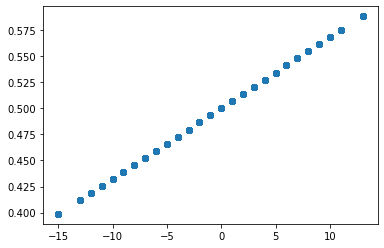

In [50]:
plt.scatter(final_seed_dataset['SeedDifferential'], final_seed_dataset['WinPred']);

# Average Rank

This zip file contains a large CSV file, listing out rankings (e.g. 1, 2, 3, ..., N) of teams going back to the 2002-2003 season, under a large number of different ranking system methodologies. The information was gathered by Kenneth Massey and provided on his College Basketball Ranking Composite page. This was a very large dataset and I was unable to load the entire csv to github. Therefore, I had decided to limit the dataset by only have the final ranking from each season which means the max RankingDayNum. I did this in Excel and then loaded the Final dataset into Github.

In [20]:
rankings = pd.read_csv('data/MasseyOrdinalsFinal.csv')
rankings.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,133,AP,1112,2
1,2003,133,AP,1163,23
2,2003,133,AP,1166,15
3,2003,133,AP,1173,16
4,2003,133,AP,1181,7


In [21]:
rankings = rankings.groupby(['Season', 'TeamID'])['OrdinalRank'].mean()
rankings = rankings.reset_index()
rankings.rename(columns={'OrdinalRank':'AvgRank'}, inplace=True)
rankings.head()

,Season,TeamID,AvgRank
0,2003,1102,156.03125
1,2003,1103,168.00000
2,2003,1104,38.03125
3,2003,1105,308.96875
4,2003,1106,262.68750


In [22]:
Wranks = rankings.rename(columns = {'TeamID':'WTeamID', 'AvgRank':'WAvgRank'})
Lranks = rankings.rename(columns = {'TeamID':'LTeamID', 'AvgRank':'LAvgRank'})
rank_merge = pd.merge(left = tourney, right = Wranks, how = 'left', on = ['Season', 'WTeamID'])
tourney_rankings = pd.merge(left = rank_merge, right = Lranks, how = 'left', on = ['Season', 'LTeamID'])
tourney_rankings = tourney_rankings.dropna()
tourney_rankings.head()

,Season,WTeamID,LTeamID,WAvgRank,LAvgRank
1136,2003,1421,1411,240.343750,239.281250
1137,2003,1112,1436,2.676471,153.125000
1138,2003,1113,1272,36.000000,21.705882
1139,2003,1141,1166,45.687500,20.735294
1140,2003,1143,1301,36.406250,50.312500


In [23]:
tourney_rankings['RankDifferential'] = tourney_rankings['WAvgRank'] - tourney_rankings['LAvgRank']
tourney_rankings.head()

,Season,WTeamID,LTeamID,WAvgRank,LAvgRank,RankDifferential
1136,2003,1421,1411,240.343750,239.281250,1.062500
1137,2003,1112,1436,2.676471,153.125000,-150.448529
1138,2003,1113,1272,36.000000,21.705882,14.294118
1139,2003,1141,1166,45.687500,20.735294,24.952206
1140,2003,1143,1301,36.406250,50.312500,-13.906250


In [24]:
rank_wins = pd.DataFrame()
rank_wins['RankDifferential'] = tourney_rankings['RankDifferential']
rank_wins['WinLoss'] = 1

rank_losses = pd.DataFrame()
rank_losses['RankDifferential'] = -tourney_rankings['RankDifferential']
rank_losses['WinLoss'] = 0

In [25]:
rank_dataset = pd.concat([rank_wins,rank_losses])
rank_dataset.head()

,RankDifferential,WinLoss
1136,1.062500,1
1137,-150.448529,1
1138,14.294118,1
1139,24.952206,1
1140,-13.906250,1


In [26]:
# Split the data into target and predictors
y2 = rank_dataset['WinLoss']
X2 = rank_dataset.drop(columns=['WinLoss'], axis=1)

In [27]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)

In [28]:
# Instantiate the model
logreg2 = LogisticRegression(fit_intercept = False, C=1e12, solver='liblinear')

# Fit the model
logreg2.fit(X_train2,  y_train2)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [29]:
# Generate predictions
y_hat_train2 = logreg2.predict(X_train2)
y_hat_test2 = logreg2.predict(X_test2)

In [30]:
residuals = np.abs(y_train2 - y_hat_train2)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    1064
1     407
Name: WinLoss, dtype: int64
------------------------------------
0    0.723317
1    0.276683
Name: WinLoss, dtype: float64


In [31]:
print('Training Precision: ', precision_score(y_train2, y_hat_train2))
print('Testing Precision: ', precision_score(y_test2, y_hat_test2))
print('\n\n')

print('Training Recall: ', recall_score(y_train2, y_hat_train2))
print('Testing Recall: ', recall_score(y_test2, y_hat_test2))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train2, y_hat_train2))
print('Testing Accuracy: ', accuracy_score(y_test2, y_hat_test2))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train2, y_hat_train2))
print('Testing F1-Score: ', f1_score(y_test2, y_hat_test2))

Training Precision:  0.7208053691275168
Testing Precision:  0.7076271186440678



Training Recall:  0.7296195652173914
Testing Recall:  0.6816326530612244



Training Accuracy:  0.7233174711080897
Testing Accuracy:  0.7006109979633401



Training F1-Score:  0.7251856853477382
Testing F1-Score:  0.6943866943866944


In [32]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test2, y_hat_test2)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[177  69]
 [ 78 167]]


In [33]:
rank_dataset['WinPred'] = [x[0] for x in logreg2.predict_proba(X2)]
rank_dataset['LossPred'] = [x[1] for x in logreg2.predict_proba(X2)]
rank_dataset.head()

,RankDifferential,WinLoss,WinPred,LossPred
1136,1.062500,1,0.507270,0.492730
1137,-150.448529,1,0.016013,0.983987
1138,14.294118,1,0.596588,0.403412
1139,24.952206,1,0.664410,0.335590
1140,-13.906250,1,0.405970,0.594030


In [34]:
rank_dataset = rank_dataset.iloc[0:981]

In [35]:
final_dataset = pd.merge(left = tourney_rankings, right = rank_dataset, how = 'left', on = ['RankDifferential'])
final_dataset.drop('WinLoss', inplace=True, axis=1)
final_dataset.head()

,Season,WTeamID,LTeamID,WAvgRank,LAvgRank,RankDifferential,WinPred,LossPred
0,2003,1421,1411,240.343750,239.281250,1.062500,0.507270,0.492730
1,2003,1112,1436,2.676471,153.125000,-150.448529,0.016013,0.983987
2,2003,1113,1272,36.000000,21.705882,14.294118,0.596588,0.403412
3,2003,1141,1166,45.687500,20.735294,24.952206,0.664410,0.335590
4,2003,1143,1301,36.406250,50.312500,-13.906250,0.405970,0.594030


In [36]:
data2017 = final_dataset.loc[final_dataset['Season'] == 2017]
data2017.head()

,Season,WTeamID,LTeamID,WAvgRank,LAvgRank,RankDifferential,WinPred,LossPred
916,2017,1243,1448,40.222222,39.152778,1.069444,0.507318,0.492682
917,2017,1291,1309,197.930556,176.902778,21.027778,0.640052,0.359948
918,2017,1413,1300,190.486111,164.791667,25.694444,0.668925,0.331075
919,2017,1425,1344,50.068493,53.277778,-3.209285,0.478052,0.521948
920,2017,1112,1315,11.706667,149.569444,-137.862778,0.022452,0.977548


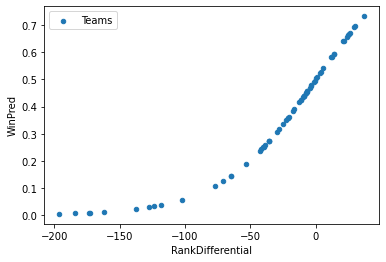

In [37]:
fig, ax = plt.subplots()
data2017.plot.scatter(x="RankDifferential", y="WinPred", label="Teams", ax=ax)
ax.legend();

In [39]:
subset = final_dataset.loc[(final_dataset["RankDifferential"]>-25) & (final_dataset["RankDifferential"]<25)]
subset

,Season,WTeamID,LTeamID,WAvgRank,LAvgRank,RankDifferential,WinPred,LossPred
0,2003,1421,1411,240.343750,239.281250,1.062500,0.507270,0.492730
2,2003,1113,1272,36.000000,21.705882,14.294118,0.596588,0.403412
3,2003,1141,1166,45.687500,20.735294,24.952206,0.664410,0.335590
4,2003,1143,1301,36.406250,50.312500,-13.906250,0.405970,0.594030
5,2003,1163,1140,27.500000,28.593750,-1.093750,0.492516,0.507484
...,...,...,...,...,...,...,...,...
975,2017,1376,1124,38.097222,14.346667,23.750556,0.657037,0.342963
977,2017,1332,1242,11.946667,6.040000,5.906667,0.540333,0.459667
978,2017,1314,1246,5.426667,4.813333,0.613333,0.504197,0.495803
981,2017,1314,1332,5.426667,11.946667,-6.520000,0.455501,0.544499


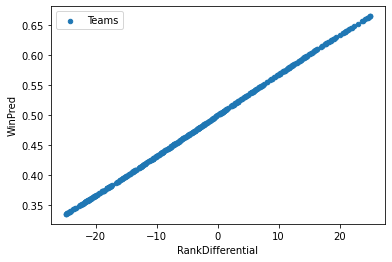

In [40]:
fig, ax = plt.subplots()
subset.plot.scatter(x="RankDifferential", y="WinPred", label="Teams", ax=ax)
ax.legend();